<a href="https://colab.research.google.com/github/noeam/Simulacion_Montecarlo/blob/develop/Montecarlo_Numerico2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center">Proyecto Final</h3>
  <h1 align="center"><b>Simulación de Montecarlo</b></h1>
</font>
<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center">Alumno: Noe E. Amador González</h3>
  <h3 align="center">No. cuenta: 419004815</h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Ángel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico 2021-1</i></h5>
</font>

**Resumen**

En este colab se mostrará una aplicación del Método de Montecarlo para estimar probabilidades. 

La idea principal de este trabajo es poder explicar cómo funciona este método en la teoría de la probabilidad. Se explicará brevemente qué hay detrás de la implementación (como la generación de números aleatorios) y se desarrollará el código necesario sin utilizar librerias que hagan todo el trabajo para entender desde la raíz y de manera intuitiva la aplicación de este método.

Finalmente se mostrará una aplicación del método y se comprobará que todo lo planteado en realidad funciona.

# Introducción

El método de Montecarlo es una herramienta muy utilizada en la prática para campos relacionados con Simulación Estocástica y Probabilidad en general.



# Desarrollo

## Generador de Números Aleatorios



<function matplotlib.pyplot.show>

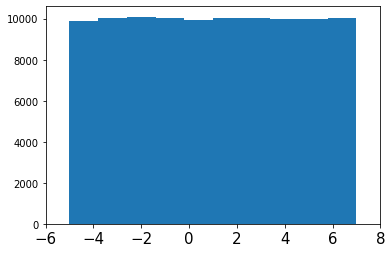

In [ ]:
import numpy as np #solo para crear arreglos "vacios" porque no se puede de manera natural 
import matplotlib.pyplot as plt


def pseudo_uniform_good(mult=16807, mod=(2**31)-1, seed = 123456789, size=1):
    U = np.zeros(size)
    x = (seed*mult+1)%mod
    U[0] = x/mod
    for i in range(1, size):
        x = (x*mult+1)%mod
        U[i] = x/mod
    return U

def pseudo_uniform(low=0, high=1, seed= 123456789, size=1):
    return low+(high-low)*pseudo_uniform_good(seed=seed, size=size)

l = pseudo_uniform(low=-5, high=7, size=100000)
plt.hist(l)
plt.xticks(fontsize=15)
plt.xlim(-6,8)
plt.show

## Integración con el Método de Montecarlo

## Ley de los Grandes Números y Teorema del Límite Central

# Aplicación del Método de Montecarlo
Ahora para demostrar que todo lo anterior tiene sentido veamos una aplicación del método de Montecarlo:

## Presentación del problema

Actualmente vivimos en medio de una pandemia, y todos queremos que la pandemia acabe lo antes posible. Una manera de darle fin es vacunándonos. 

A día de hoy ya se ha comenzado a implementar un plan de vacunación en varios países incluyendo México.


<img src="https://github.com/noeam/Simulacion_Montecarlo/blob/main/Imagenes/share-people-fully-vaccinated-covid.png" width="700">

https://github.com/noeam/Simulacion_Montecarlo/blob/main/Imagenes/share-people-fully-vaccinated-covid.png

Dentro del Plan Nacional de Vacunación de México se dice que uno de los objetivos específicos es vacunar (inmunizar) mínimo al 70% de la población en México para lograr la inmunidad de rebaño contra el COVID-19.

Según datos del INEGI, la **población de México** es de 126,014,024 personas, por lo que haciendo algunas cuentas secillas

$$
126014024 * 0.7 \approx 88209816.8
$$
Es decir que el 70% de la población equivale a 88,209,817 personas. Por lo que necesitamos que esta cantidad de personas estén vacunadas para poder "vencer" al COVID-19

> Vencer: Retomar las actividades diarias/comunes de manera "normal".


Ahora, veamos algunos otros datos importantes recabados por el proyecto *Our World In Data*.

Estos datos los podemos ver en el siguiente DataFrame, el cual contiene las fechas de los **días activos** de vacunación, y la **cantidad de personas vacunadas** (acumuladas por día) en dichas fechas.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Mexico.csv'
df = pd.read_csv(url)
#print(df.iloc[ -5:, :])
print(df)

   location        date  ... people_vaccinated people_fully_vaccinated
0    Mexico  2020-12-24  ...            2924.0                     NaN
1    Mexico  2020-12-27  ...            6824.0                     NaN
2    Mexico  2020-12-28  ...            9579.0                     NaN
3    Mexico  2020-12-29  ...           18529.0                     NaN
4    Mexico  2020-12-30  ...           24998.0                     NaN
5    Mexico  2021-01-04  ...           43960.0                     NaN
6    Mexico  2021-01-05  ...           48236.0                     NaN
7    Mexico  2021-01-06  ...           53185.0                     NaN
8    Mexico  2021-01-07  ...           58402.0                     NaN
9    Mexico  2021-01-08  ...           67468.0                     NaN
10   Mexico  2021-01-09  ...           74794.0                     NaN
11   Mexico  2021-01-10  ...           81300.0                     NaN
12   Mexico  2021-01-11  ...           87060.0                     NaN
13   M

Es importante observar que la cantidad de personas vacunadas es la cantidad de dosis inyectadas, pero algunas vacunas requieren 2 dosis.

SIN EMBARGO, PARA FINES DE ESTE PROYECTO SUPONDREMOS QUE SOLO SE NECESITA UNA DOSIS PARA INMUNIZAR A UNA PERSONA.

Con lo que si tomamos los datos necesarios obtenemos que:
- Hasta este momento hay **630,820 personas vacunadas**
- Se ha vacunado a todas estas personas en **31 días activos de vacunación**.
- En promedio, **20,350 personas son vacunadas por día**

*(Actualizado al 31 de Enero 2021)*


In [ ]:
#Actualización de los datos anteriores
vacunados = df.iloc[-1,-2]
dias_activos = len(df)
vacunas_por_dia = vacunados/dias_activos
print(f"Los datos muestran que hay {vacunados} personas vacunadas hasta este momento")
print(f"Hasta hoy se contabilizan {dias_activos} días activos de vacunación")
print(f"Actualmente en México se vacunan a un promedio de {vacunas_por_dia} personas por día")

Los datos muestran que hay 630820.0 personas vacunadas hasta este momento
Hasta hoy se contabilizan 31 días activos de vacunación
Actualmente en México se vacunan a un promedio de 20349.032258064515 por día


Con todo esto en mente podemos comenzar a describir y plantear nuestro problema:

Buscamos la probabilidad de que para Enero de 2022 el 70% de la población esté vacunada y podamos "vencer" al COVID-19.

De manera matemática podemos imaginar que cada día es una variable aleatoria $X$, esta variable describe la cantidad de personas vacunadas en ese día.

Para llegar a Enero de 2022 todavía falta casi un año. Haciendo cuentas: 
$$
365-31=334
$$
Faltan 334 días para llegar a 2022,
entonces debemos tomar 334 variables aleatorias, donde cada una representa la cantidad de personas vacunadas en cada día.

Sean $X_1, X_2,..., X_{334}$ la variables aleatorias, observemos que cada $X_i$ puede tomar muchos diferentes valores. En este caso, **supondremos que en un día se vacuna a mínimo 25,000 personas y máximo 100,000**, por lo que $X_i$ toma valores entre $25,000$ y 100,000$ con la misma probabilidad. De manera matemática:

$$
X_i \sim U[25000,100000]
$$

*Justificación: Este problema se puede hacer tan complejo como queramos pues en realidad la cantidad de personas vacunadas por día depende de muchos factores como la fabricación masiva de vacunas que se reparten por todo el mundo, el presupuesto para comprar las vacunas, la cantidad de vacunas que llegan y las fechas de entrega, la capacidad/cantidad de personal que pueda unirse a brigadas de vacunación, entre muchos otros factores más.* 

*Es probable que en los proximos meses, cuando lleguen muchas más vacunas, se puedan aplicar hasta medio millón (o más) de dosis diarias, pero eso vuelve el problema más complejo. Desafortunadamente ahorita los datos son escasos y las intuiciones un poco inseguras.*




## Solución al problema

Ya que sabemos todo lo anterior comencemos a resolver el problema:

Denotemos por $t=88,000,000$ al total de personas que se necesitan vacunar (aproximadamente).

Nos gustaria que el total de vacunados $t$ sean más de $88,000,000$ después de los 334 días, entonces buscamos la siguiente probabilidad:

$$
P(\sum_{i=1}^{334} X_i > t)=?
$$

Si aplicamos el Teorema del Límite Central tenemos que
$$
P(\frac{\sum_{i=1}^{334} X_i - 334*\mu}{\sigma*\sqrt{334}} > \frac{t - 334*\mu}{\sigma*\sqrt{334}})=?
\tag{1}
$$

Donde podemos afirmar que:

$$
Z = \frac{\sum_{i=1}^{334} X_i - 334*\mu}{\sigma*\sqrt{334}}\sim N(0,1)
$$

Y donde $\mu=E[X_i]$ y $\sigma = Var[X_i]=E[X_i^2]-E[X_i]^2$

Pero como sabemos que $X_i \sim U(a,b)$ donde $a=25,000$ y $b=100,000$ entonces:

$$
\mu = E[X_i]=\frac{a+b}{2}=\frac{25,000+100,000}{2}=62,500
$$
$$
\sigma = Var[X_i] = \frac{(b-a)^2}{12}= \frac{(100,000-25,000)^2}{12}=468,750,000
$$

Y sustituyendo en (1) tenemos que:

Sea $p=\frac{t - 334*\mu}{\sigma*\sqrt{n}}$ entonces
$$
p = \frac{88,000,000 - 334*62,500}{2,812,500,000*\sqrt{334}}=2.61707549757358
$$

In [ ]:
import math
n = 334
mu = (25000+100000)/2
var= ((100000-25000)**2)/12
p = (88000000-n*mu)/var*math.sqrt(n)
print("Tenemos que p es", p)

Tenemos que p es 2.61707549757358




Por lo anterior llegamos a que el problema se reduce a calcular la siguiente probabilidad:

$$
R = P(Z>2.61707549757358) = 1-P(Z < 2.61707549757358)
$$

Donde $\frac{1}{\sqrt{2\pi}}e^{{-\frac{1}{2}x^2}}$ es la función de densidad de una variable aleatoria $Z \sim N(0,1)$, por lo que en terminos matemáticos obtenemos que

$$
R = 1 - \int_{-\infty}^{2.61707549757358} \frac{1}{\sqrt{2\pi}}e^{{-\frac{1}{2}x^2}}dx
$$


Esta última integral es muy conocida por su importancia en la Teoria de la Probabilidad pero tambien en el Análisis Matemático pues contiene una complejidad que por si misma es difícil de resolver analíticamente y que por lo general se calcula por medio de tablas y aproximaciones que se han mantenido ha lo largo de los años.

Es aquí donde entra el **Método de Montecarlo**, pues al presentarse una integral de semajante complejidad el método de Montecarlo es muy útil para encontrar una aproximación, pues como hemos visto antes, podemos aproximar esa integral por medio de sumas.

El código queda de la siguiente manera:

**Solución con los métodos escritos en el Desarrollo**

In [ ]:
#Aproximación sin numpy
import math

'''Integracion numerica de Monte Carlo
f: funcion a integrar
N: numero de valores aleatorios
a,b,c,d: limites de integracion
'''
def MonteCarlo(f,N,a,b):
    # area a integrar
    dim = (b-a)	
    # valores aleatorios para								
    a1 = pseudo_uniform(size=N)						
    # acumulador temporal
    temp = 0
    # ciclo para realizar la suma de MC											
    for i in range(N):
        # valores recorridos
        xr = a1[i]*(b-a)+a
        # evaluacion
        temp += f(xr)								
    # aproximacion mediante MC
    return dim*temp/N

mu = 0
sigma = 1
integral = lambda x: (1/math.sqrt(2*math.pi))*(math.e)**((-x**2)/2)

#Tomamos 1000 numeros aleatorios y calculamos la integral de -5 a 2.6170
# el limite inferior es -5 y no -inf  pues para una densidad normal
# la mayor parte del "area" se concentra en (-4,4)
# utilizar -in nos provoca un 
print("La probabilidad es ", 1-MonteCarlo(integral, 100000, -5, 2.6170)) 

La probabilidad es  0.0054385867940823784


**Solución de la integral con numpy**

In [ ]:
#Aproximacion con numpy
import numpy as np
import math

'''Integracion numerica de Monte Carlo
f: funcion a integrar
N: numero de valores aleatorios
a,b,c,d: limites de integracion
'''
def MonteCarlo(f,N,a,b):
    # area a integrar
    dim = (b-a)	
    # valores aleatorios para								
    a1 = np.random.uniform(size=N)						
    # acumulador temporal
    temp = 0
    # ciclo para realizar la suma de MC											
    for i in range(N):
        # valores recorridos
        xr = a1[i]*(b-a)+a
        # evaluacion
        temp += f(xr)								
    # aproximacion mediante MC
    return dim*temp/N

mu = 0
sigma = 1
integral = lambda x: (1/math.sqrt(2*math.pi))*(math.e)**((-x**2)/2)

print("La probabilidad es: ", 1-MonteCarlo(integral, 100000, -5, 2.6170))

La probabilidad es:  0.004860603084765769


La solución por medio de tablas nos dice que:
$$
R = 1-P(Z< 2.61707549757358)=1 - 0.99556 = 0.00444
$$

Por lo tanto la probabilidad de que para Enero de 2022 el 70% de la población ya este vacunada es de $R=0.00444=0.4\%$.
¡Una probabilidad muy baja!

Una visualización sencilla de la acumulación de personas vacunadas en los proximos 334 días

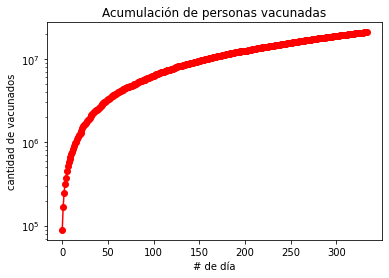

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def grafica(N):
    x = np.arange(N)
    y = np.zeros_like(x)
    y[0]=np.random.uniform(25000,100000)
    for i in range(1, N):
        y[i] = y[i-1]+np.random.uniform(25000,100000)
    plt.plot(x,y, "-o", color="r")
    plt.title("Acumulación de personas vacunadas")
    plt.xlabel("# de día")
    plt.ylabel("cantidad de vacunados")
    plt.yscale("log")
    plt.show()

grafica(334)


#Conclusiones
## Conclusiones del Problema

Es importante hacer enfásis que el problema tiene muchas suposiciones como el hecho de que se pueden vacunar minimo 25,000 personas y máximo 100,000, pero esto en la realidad no es cierto pues ha habido días en los que se vacunan a menos de 5,000 personas por la escases de vacunas que hay. Por otro lado, según lo expuesto por el gobierno, se espera vacunar a más de 100,000 personas diarias por medio de miles de brigadas de vacunación en cuanto lleguen más vacunas en cantidades más grandes a las que han llegado enestos primeros 31 días. 

El problema es realmente complejo, pero creo que la simplificación que he hecho ha cumplido su propósito para mostrar la utilidad del Método de Montecarlo.

## Conclusiones Generales

Aunque el problema es muchísimo más complejo de lo que resolvimos aquí lo importante fue el razonamiento y la aplicación del Teorema del Limite Central y el Método de Montecarlo para estimar probabilidades. Espero que este ejemplo sirva como un pequeño repaso para los que ya saben y un ejemplo entendible para los que recién se adentran en estos temas.

Este trabajo ha servido mucho para asentar conocimientos que se me han presentado este semestre y que considero son fundamentales para la modelación matemática.

# Referencias


1.   [IBM](https://www.ibm.com/cloud/learn/monte-carlo-simulation)
2.   [Our World In Data](https://ourworldindata.org/covid-vaccinations)

3. [Política Nacional de Vacunación](https://coronavirus.gob.mx/wp-content/uploads/2021/01/PolVx_COVID_-11Ene2021.pdf)

4. [INEGI](https://www.inegi.org.mx/temas/estructura/)

